## 1. Data Loading and Exploration:

- The CSV data contains weather events, their windspeed, and an additional `IsPropertyDamage` column indicating whether the event caused property damage.


In [1]:
# Step 1: Read and Understand the Data

import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Load the data
csv_df = pd.read_csv('./data/weather-coding-challenge.csv')

# Inspect the data
print("First few rows of the dataset:")
print(csv_df.head())

print("\nSummary statistics of the dataset:")
print(csv_df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(csv_df.isnull().sum())


First few rows of the dataset:
   id              Event  Windspeed  IsPropertyDamage
0   0               Hail     42.160                 1
1   1  Thunderstorm Wind     32.400                 1
2   2               Hail     59.480                 1
3   3               Hail      6.920                 1
4   4               Hail      0.975                 0

Summary statistics of the dataset:
                id    Windspeed  IsPropertyDamage
count  1000.000000  1000.000000       1000.000000
mean    499.500000     6.636981          0.336000
std     288.819436    10.652528          0.472575
min       0.000000     0.000000          0.000000
25%     249.750000     1.600600          0.000000
50%     499.500000     3.212500          0.000000
75%     749.250000     4.850000          1.000000
max     999.000000    69.360000          1.000000

Summary statistics of the dataset:
                id    Windspeed  IsPropertyDamage
count  1000.000000  1000.000000       1000.000000
mean    499.500000     

## 2. Exploratory Data Analysis (EDA):

#### 2.1 Distribution of Weather Events:

- **Insight**: This count plot shows the frequency of each weather event type in the dataset.

- **Findings**:
    - The most common events are "Hail" and "Thunderstorm Wind", with "Hail" being the most frequent.
    - Less common events include "Funnel Cloud", "Waterspout", "Marine Hail", and "Marine Strong Wind".

- **Action**:
    - Consider balancing the dataset with Techniques such as oversampling, undersampling, or SMOTE can be used.


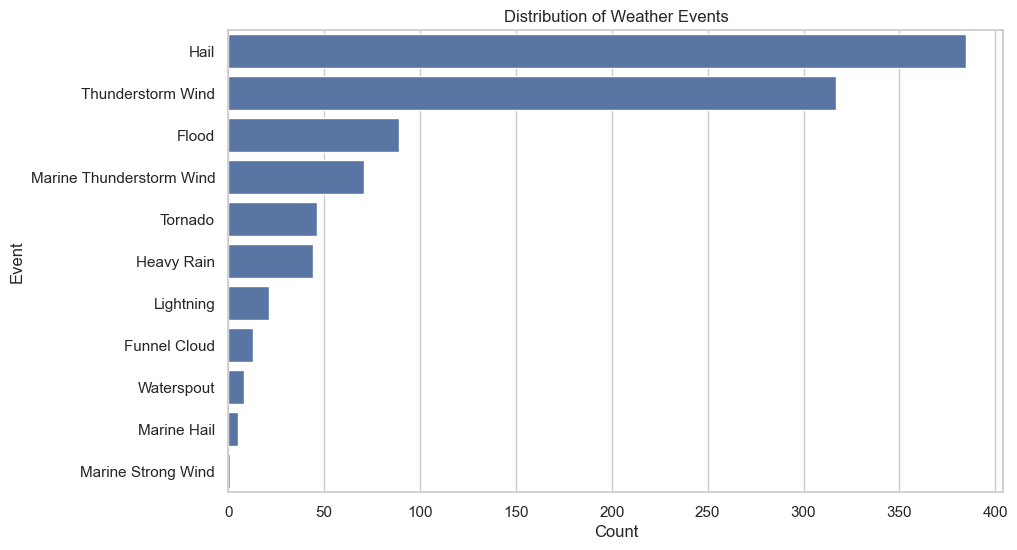

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualization 1: Distribution of Weather Events
plt.figure(figsize=(10, 6))
sns.countplot(y='Event', data=csv_df, order=csv_df['Event'].value_counts().index)
plt.title('Distribution of Weather Events')
plt.xlabel('Count')
plt.ylabel('Event')
plt.show()



#### 2.2 Distribution of Windspeed:

- **Insight**: This histogram with a KDE plot shows the distribution of windspeed values.

- **Findings**:
    - Windspeed values are concentrated at lower values, with a right-skewed distribution.
    - Few occurrences have high wind speeds.

- **Action**:
    - Normalize or transform the windspeed data if the skewness affects the modeling performance.
    - Consider creating categorical bins for windspeed to simplify the relationship modeling.


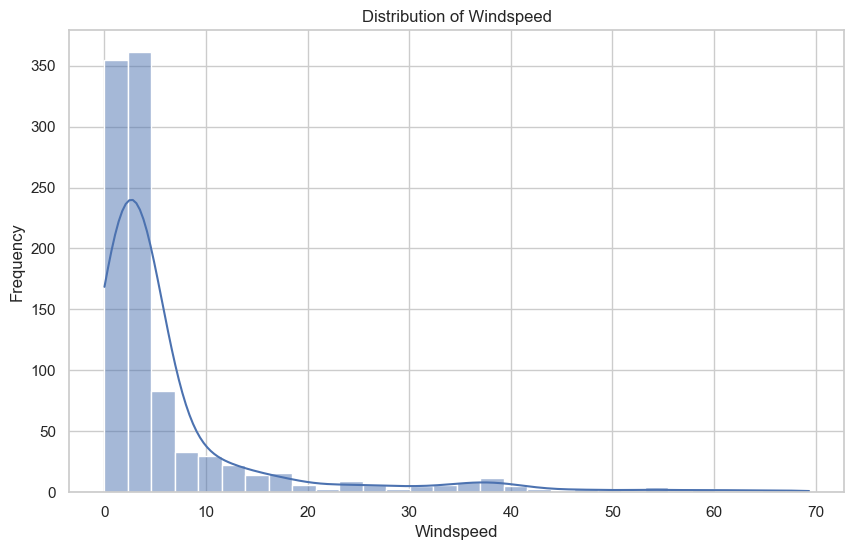

In [3]:
# Visualization 2: Distribution of Windspeed
plt.figure(figsize=(10, 6))
sns.histplot(csv_df['Windspeed'], bins=30, kde=True)
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

#### 2.3 Windspeed vs. Property Damage:

- **Insight**: This box plot shows the distribution of windspeed values for events that caused property damage versus those that didn't.

- **Findings**:
    - Higher windspeed events tend to be associated with property damage.
    - Median windspeed is higher for events that caused property damage.

- **Action**:
    - Use windspeed as an important feature in predicting property damage.
    - Consider interaction terms between windspeed and other features.


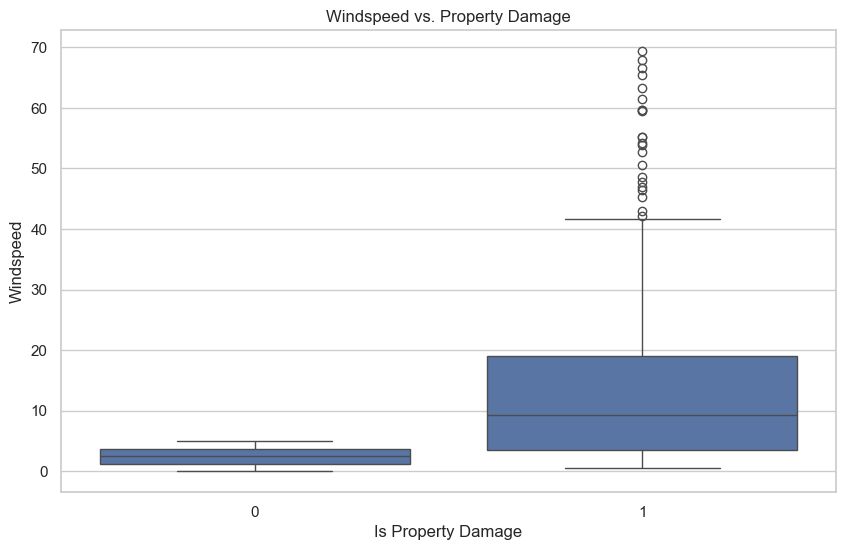

In [4]:
# Visualization 3: Windspeed vs. IsPropertyDamage
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsPropertyDamage', y='Windspeed', data=csv_df)
plt.title('Windspeed vs. Property Damage')
plt.xlabel('Is Property Damage')
plt.ylabel('Windspeed')
plt.show()

#### 2.4 Event vs. Windspeed with Property Damage:

- **Insight**: This scatter plot shows the relationship between windspeed, event types, and property damage.

- **Findings**:
    - Certain events like "Tornado" and "Thunderstorm Wind" with higher windspeed are more likely to cause property damage.
    - Different events have varying typical windspeed ranges.

- **Action**:
    - Use interaction effects between event type and windspeed in the modeling process.
    - Consider using windspeed as a significant predictor for events that might cause property damage.

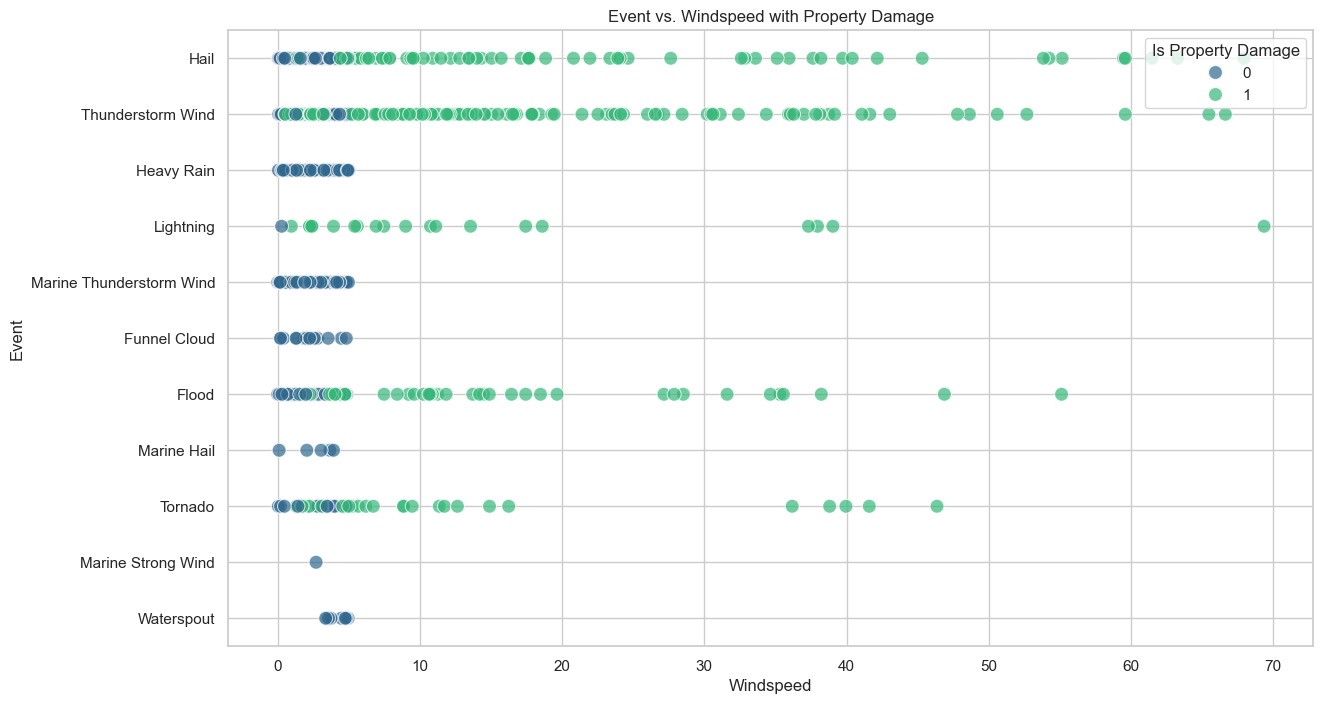

In [5]:
# Visualization 4: Event vs. Windspeed with Property Damage
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Windspeed', y='Event', hue='IsPropertyDamage', data=csv_df, palette='viridis', s=100, alpha=0.7)
plt.title('Event vs. Windspeed with Property Damage')
plt.xlabel('Windspeed')
plt.ylabel('Event')
plt.legend(title='Is Property Damage', loc='upper right')
plt.show()

## 3. Feature Engineering with Further Analysis

#### 3.1 Feature Engineering

Feature engineering involves creating new features or transforming existing ones to improve the performance of machine learning models. feature engineering steps:

1. **Create Wind Speed Categories**:
    - Categorize wind speeds into different bins (e.g., low, medium, high) to capture non-linear relationships.

2. **Event Encoding**:
    - Convert the categorical `Event` variable into numerical values using one-hot encoding.

3. **Interaction Features**:
    - Create interaction features between `Windspeed` and `IsPropertyDamage` to capture their combined effect.


#### 3.2 Further Analysis

To gain deeper insights into the data, we can perform the following analysis:

1. **Correlation Analysis**:
    - Calculate and visualize the correlation matrix to understand relationships between features.

2. **Event and Damage Analysis**:
    - Analyze the proportion of property damage for each weather event.


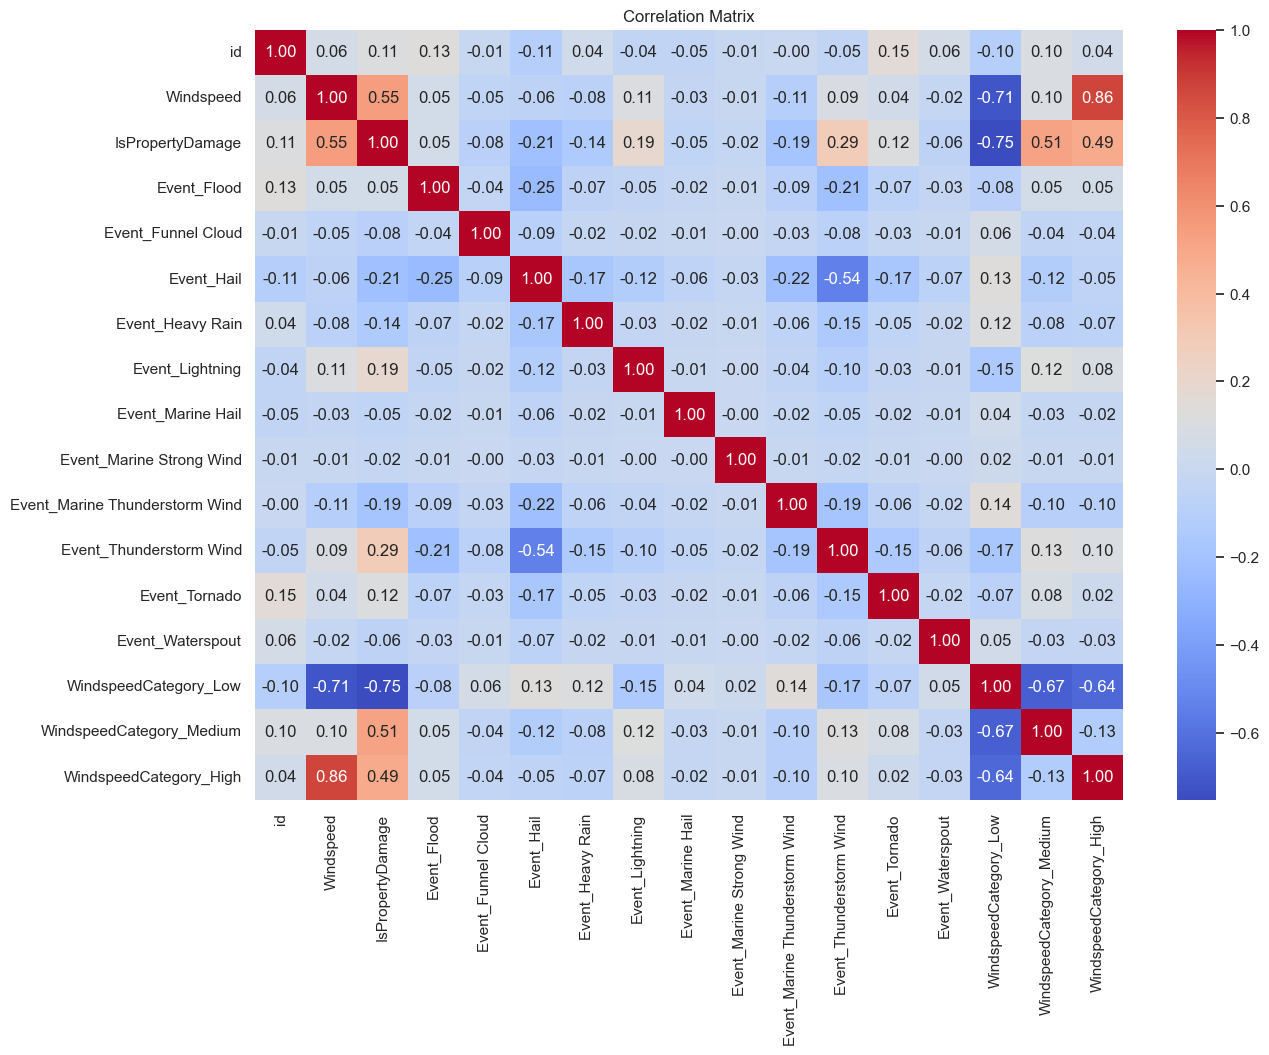

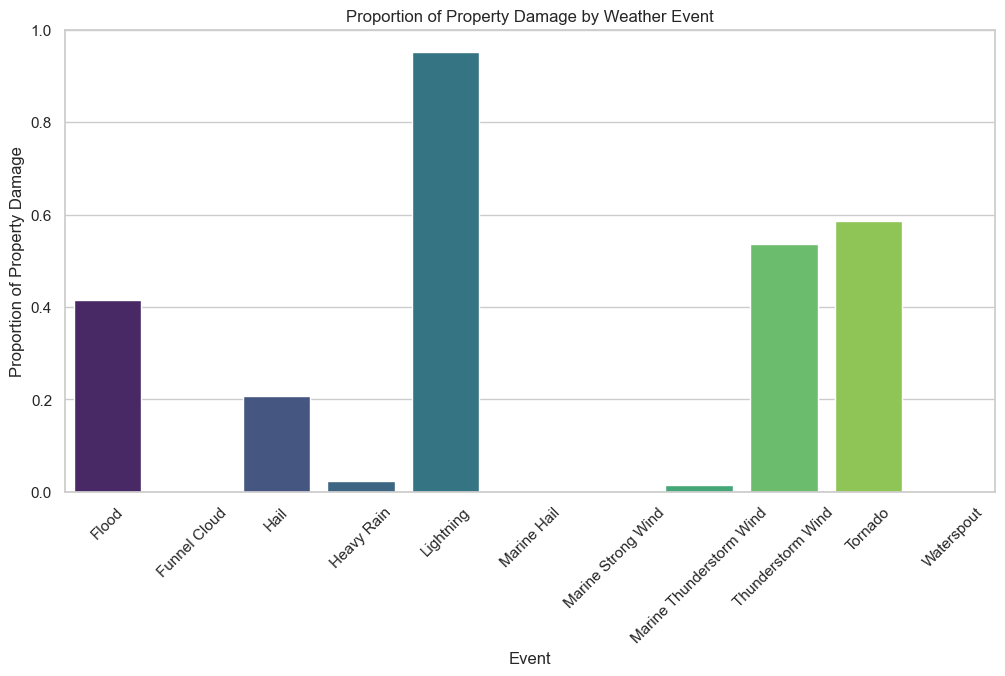

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Wind Speed Categories
bins = [0, 5, 15, float('inf')]
labels = ['Low', 'Medium', 'High']
csv_df['WindspeedCategory'] = pd.cut(csv_df['Windspeed'], bins=bins, labels=labels)

# Step 2: One-Hot Encoding for Event and WindspeedCategory
event_encoded_df = pd.get_dummies(csv_df, columns=['Event', 'WindspeedCategory'])

# Step 3: Correlation Analysis
correlation_matrix = event_encoded_df.corr()

# Step 4: Event and Damage Analysis
damage_analysis = csv_df.groupby('Event')['IsPropertyDamage'].mean().reset_index()

# Plot Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot Event and Damage Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Event', y='IsPropertyDamage', data=damage_analysis, palette='viridis')
plt.title('Proportion of Property Damage by Weather Event')
plt.xlabel('Event')
plt.ylabel('Proportion of Property Damage')
plt.xticks(rotation=45)
plt.show()



##### Correlation Matrix
##### Results:
- **Windspeed** has a moderate positive correlation with **IsPropertyDamage** (0.55). This suggests that higher wind speeds are associated with a higher likelihood of property damage.
- **WindspeedCategory_Low** has a strong negative correlation with **IsPropertyDamage** (-0.75), indicating that low windspeed events are less likely to cause property damage.
- **WindspeedCategory_High** has a moderate positive correlation with **IsPropertyDamage** (0.49), which aligns with the positive correlation of windspeed with property damage.
- **Event_Lightning** shows a moderate positive correlation with **IsPropertyDamage** (0.19), suggesting that lightning events are somewhat likely to cause property damage.
- **Event_Tornado** and **Event_Thunderstorm Wind** have lower but still positive correlations with property damage (0.15 and 0.29, respectively).
##### Proportion of Property Damage by Weather Event
##### Results:
- **Lightning** events have the highest proportion of causing property damage (close to 1.0), indicating nearly all lightning events cause property damage.
- **Tornado** and **Thunderstorm Wind** also have high proportions of causing property damage.
- **Flood** events have a moderate proportion of property damage.
- **Hail** and **Heavy Rain** have lower proportions of causing property damage.



#### 3.3 Data Encoding:

- **Encoding**: The categorical variables `Event` and `WindspeedCategory` are encoded using one-hot encoding.
- **Output**: Shows the first few rows of the encoded features and target variable.


In [7]:

# Step 1: Create Wind Speed Categories
bins = [0, 5, 15, float('inf')]
labels = ['Low', 'Medium', 'High']
csv_df['WindspeedCategory'] = pd.cut(csv_df['Windspeed'], bins=bins, labels=labels)

# Step 2: One-Hot Encoding for Event and WindspeedCategory
event_encoded_df = pd.get_dummies(csv_df, columns=['Event', 'WindspeedCategory'])

# Prepare the features and target variable
X = event_encoded_df.drop(columns=['id', 'IsPropertyDamage'])
y = event_encoded_df['IsPropertyDamage']



#### 3.4 Data Normalization:

- **Normalization**: The `Windspeed` feature is normalized to have zero mean and unit variance.
- **Output**: Shows the first few rows of the normalized training and testing sets.


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize the windspeed feature
scaler = StandardScaler()
X_train[['Windspeed']] = scaler.fit_transform(X_train[['Windspeed']])
X_test[['Windspeed']] = scaler.transform(X_test[['Windspeed']])


#### 3.5 Data Balancing with SMOTE:

- **SMOTE**: The Synthetic Minority Over-sampling Technique (SMOTE) is applied to balance the class distribution in the training data.
- **Output**: Shows the class distribution before and after applying SMOTE.


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Summary
print("Before SMOTE: ", y_train.value_counts())
print("After SMOTE: ", pd.Series(y_train_resampled).value_counts())


Before SMOTE:  IsPropertyDamage
0    465
1    235
Name: count, dtype: int64
After SMOTE:  IsPropertyDamage
0    465
1    465
Name: count, dtype: int64


## 4. Model Training and Hyperparameter Tuning:

- **Hyperparameter Tuning**: GridSearchCV is used to find the best hyperparameters for the Logistic Regression model.
- **Output**: Displays the best hyperparameters found by GridSearchCV.


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}


## 5. Model Prediction:

- **Prediction**: The best model is used to make predictions on the test set.
- **Output**: Shows the first 10 predictions.


In [11]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Summary
print(y_pred_best[:10])


[1 0 1 0 0 1 0 1 0 1]


## 6. Model Evaluation:

- **Evaluation Metrics**: Accuracy, precision, recall, F1 score, and confusion matrix are calculated to evaluate the model.
- **Output**: Displays the evaluation metrics and classification report.
#### Conclusion

- The accuracy of the best model is high, indicating good performance.
- The confusion matrix provides insights into the true positives, false positives, true negatives, and false negatives, which are essential for understanding model performance.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Generate a classification report
report = classification_report(y_test, y_pred_best)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = conf_matrix.ravel()

# Display the evaluation metrics
print(f"Best Model Accuracy: {accuracy_best:.2f}")
print(f"Best Model Precision: {precision_best:.2f}")
print(f"Best Model Recall: {recall_best:.2f}")
print(f"Best Model F1 Score: {f1_best:.2f}")
print("Classification Report:\n", report)
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


Best Model Accuracy: 0.89
Best Model Precision: 0.89
Best Model Recall: 0.89
Best Model F1 Score: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       199
           1       0.90      0.75      0.82       101

    accuracy                           0.89       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.89      0.89      0.89       300

True Negatives: 191
False Positives: 8
False Negatives: 25
True Positives: 76


## 7. Save the Model

In [15]:
import joblib
import os

# Create a directory for the model if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the best model
joblib.dump(best_model, 'model/logistic_regression_best_model.pkl')

# Save the scaler
joblib.dump(scaler, 'model/scaler.pkl')

# Save the columns used for encoding
joblib.dump(X.columns, 'model/columns.pkl')

print("Model and related objects saved successfully.")


Model and related objects saved successfully.
